<a href="https://colab.research.google.com/github/Vridhi-Wadhawan/product-segmentation-affinity-analysis/blob/main/affinity_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Affinity-Based Product Segmentation Analysis
# Author: Vridhi Wadhawan

### General Setup & Data Loading

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Reproducibility
np.random.seed(42)

In [ ]:
# ------------------------------------------------------------
# Load Data
# ------------------------------------------------------------
prefs = pd.read_excel("prefs.xlsx")
demo = pd.read_excel("demographics-full.xlsx")

prefs = prefs.rename(columns={"Cust": "cust_id"})
demo = demo.rename(columns={"id": "cust_id"})

data = prefs.merge(demo, on="cust_id", how="inner")

print("Data Loaded and Merged:", data.shape)
print(data.head())

Data Loaded and Merged: (311, 57)
   cust_id  pPr30  pPr10  pPr05  pIn0.5  pIn1  pIn3  pCp12  pCp20  pCp32  ...  \
0        1      1      3      7       1     3     7      1      7      6  ...   
1        2      1      6      7       1     4     7      1      7      6  ...   
2        3      1      6      7       1     4     7      7      4      1  ...   
3        4      1      6      7       1     4     7      7      1      3  ...   
4        5      1      4      7       1     4     7      1      7      2  ...   

         expU2        expU3         Total        P1        P2        P3  \
0  1321.205690  2209.673398  14612.020827  0.758358  0.090419  0.151223   
1  9510.008031  3127.846414  25022.342435  0.494937  0.380061  0.125002   
2  1057.750751    92.888514   1204.656330  0.044840  0.878052  0.077108   
3   378.153425  2119.424779   7310.213059  0.658344  0.051729  0.289927   
4   338.356475   135.192542    567.737697  0.165902  0.595973  0.238125   

   income  age  sports  grad

In [ ]:
# ------------------------------------------------------------
# Defining the Required Descriptor Columns
# ------------------------------------------------------------

descriptors = [
    "IPr","Iin","ICp","ICl","Icn","IBr",
    "pPr30","pPr10","pPr05",
    "pIn0.5","pIn1","pIn3",
    "pCp12","pCp20","pCp32",
    "pClD","pClF","pClE",
    "pCnSl","pCnSp","pCnLk",
    "pBrA","pBrB","pBrC",
    "income","age","sports","gradschl"]

# Keep only available descriptors
descriptors = [c for c in descriptors if c in data.columns]

print("\nDescriptors Used (Count = {}):".format(len(descriptors)))
print(descriptors)

# Grouping descriptors into meaningful blocks (for interpretation & plots)

importance_vars = ["IPr","Iin","ICp","ICl","Icn","IBr"]

interaction_vars = [c for c in descriptors if c.startswith((
    "pPr","pIn","pCp","pCl","pCn","pBr"))]

demo_vars = ["income","age","sports","gradschl"]

print("\nFeature Groups Formed:")
print(" - Attribute Importance Variables:", len(importance_vars), importance_vars)
print(" - Interaction Variables:", len(interaction_vars),interaction_vars)
print(" - Demographic Variables:", len(demo_vars),demo_vars)

# Combined list for later visualizations
feature_groups = {
    "Importance": importance_vars,
    "Attribute Level Effects": interaction_vars,
    "Demographics": demo_vars
}


Descriptors Used (Count = 28):
['IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12', 'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 'income', 'age', 'sports', 'gradschl']

Feature Groups Formed:
 - Attribute Importance Variables: 6 ['IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr']
 - Interaction Variables: 18 ['pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12', 'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC']
 - Demographic Variables: 4 ['income', 'age', 'sports', 'gradschl']


### Weighted Mean

Segment profiles are estimated using probability-weighted means to preserve soft membership rather than hard clustering assignments.

In [ ]:
# ------------------------------------------------------------
# Weighted Means and Differences for Each Brand Segment
# ------------------------------------------------------------

def wmean(df, weight_col, cols):
    w = df[weight_col]
    return (df[cols].multiply(w, axis=0).sum() / w.sum())

means_A = wmean(data, "P1", descriptors)
means_B = wmean(data, "P2", descriptors)
means_C = wmean(data, "P3", descriptors)
means_overall = data[descriptors].mean()

means_df = pd.DataFrame({
    "Brand A (P1)": means_A,
    "Brand B (P2)": means_B,
    "Brand C (P3)": means_C,
    "Overall Mean": means_overall
})

print("Weighted Mean Computed for A, B, C and Overall Mean")
print(means_df)

Weighted Mean Computed for A, B, C and Overall Mean
          Brand A (P1)  Brand B (P2)  Brand C (P3)  Overall Mean
IPr          17.889865     38.641084     26.878978     29.125402
Iin          13.871925      9.169646      9.580959     10.887460
ICp          16.100413     12.103289     11.985991     13.472669
ICl          18.657181     14.740863     21.788599     17.475884
Icn          20.406393     12.426645     16.805945     16.057878
IBr          13.091931     12.888691     12.997817     12.980707
pPr30         1.000000      1.000000      1.000000      1.000000
pPr10         4.916599      5.656125      4.979263      5.266881
pPr05         7.000000      7.000000      7.000000      7.000000
pIn0.5        1.000000      1.000000      1.000000      1.000000
pIn1          3.929896      4.072100      4.170958      4.041801
pIn3          7.000000      7.000000      7.000000      7.000000
pCp12         3.267186      3.099572      3.081007      3.154341
pCp20         5.349850      5.332181  

In [ ]:
# Differences between each brand's weighted mean and the overall weighted mean
differences_df = pd.DataFrame({
    "Difference (Overall - A)": means_overall - means_A,
    "Difference (Overall - B)": means_overall - means_B,
    "Difference (Overall - C)": means_overall - means_C
})

print("\nWeighted Mean Differences from Overall Mean")
display(differences_df)


Weighted Mean Differences from Overall Mean


,Difference (Overall - A),Difference (Overall - B),Difference (Overall - C)
IPr,1.123554e+01,-9.515682,2.246424e+00
Iin,-2.984465e+00,1.717814,1.306501e+00
ICp,-2.627745e+00,1.369380,1.486678e+00
ICl,-1.181297e+00,2.735022,-4.312715e+00
Icn,-4.348516e+00,3.631233,-7.480671e-01
IBr,-1.112235e-01,0.092016,-1.711010e-02
pPr30,0.000000e+00,0.000000,0.000000e+00
pPr10,3.502817e-01,-0.389244,2.876181e-01
pPr05,-8.881784e-16,0.000000,1.776357e-15
pIn0.5,0.000000e+00,0.000000,0.000000e+00


### Log-Lifts

In [ ]:
# ------------------------------------------------------------
# Log-Lifts (base 10)
# ------------------------------------------------------------

def loglift(seg, overall):
    return np.log10((seg+1e-9)/(overall+1e-9))

loglifts = pd.DataFrame({
    "A_LogLift": loglift(means_A, means_overall),
    "B_LogLift": loglift(means_B, means_overall),
    "C_LogLift": loglift(means_C, means_overall)
})

print("\nLog-Lifts Computed for A, B, C")
print(loglifts)


Log-Lifts Computed for A, B, C
             A_LogLift  B_LogLift     C_LogLift
IPr      -2.116649e-01   0.122777 -3.485917e-02
Iin       1.052102e-01  -0.074574 -5.551757e-02
ICp       7.738340e-02  -0.046550 -5.077970e-02
ICl       2.840686e-02  -0.073916  9.579015e-02
Icn       1.040781e-01  -0.111334  1.977479e-02
IBr       3.705343e-03  -0.003090  5.720743e-04
pPr30     0.000000e+00   0.000000  0.000000e+00
pPr10    -2.988869e-02   0.030965 -2.438845e-02
pPr05     9.643275e-17   0.000000 -9.643275e-17
pIn0.5    0.000000e+00   0.000000  0.000000e+00
pIn1     -1.219384e-02   0.003244  1.366094e-02
pIn3      9.643275e-17   0.000000 -9.643275e-17
pCp12     1.526527e-02  -0.007607 -1.021593e-02
pCp20     4.709368e-04  -0.000966  1.421234e-03
pCp32    -1.219293e-02   0.009113 -1.161873e-04
pClD      0.000000e+00   0.000000  0.000000e+00
pClF     -6.653568e-03   0.008679 -8.869124e-03
pClE      9.643275e-17   0.000000 -9.643275e-17
pCnSl     0.000000e+00   0.000000  0.000000e+00
pCnSp   

### Combined Output Table

In [ ]:
# ------------------------------------------------------------
# Grouped Segment Combined Output Table
# ------------------------------------------------------------

# Define descriptive labels for each variable
variable_labels = {
    "IPr": "Importance of Price",
    "Iin": "Importance of Time Insulated",
    "ICp": "Importance of Capacity",
    "ICl": "Importance of Cleanability",
    "Icn": "Importance of Containment",
    "IBr": "Importance of Brand",
    "pPr30": "Price $30",
    "pPr10": "Price $10",
    "pPr05": "Price $5",
    "pIn0.5": "0.5 Hour",
    "pIn1": "1 Hour",
    "pIn3": "3 Hours",
    "pCp12": "12 oz Capacity",
    "pCp20": "20 oz Capacity",
    "pCp32": "32 oz Capacity",
    "pClD": "Difficult Cleanability (7mins)",
    "pClF": "Fair Cleanability (5 min)",
    "pClE": "Easy Cleanability (2 min)",
    "pCnSl": "Slosh Resistant Containment",
    "pCnSp": "Spill Resistant Containment",
    "pCnLk": "Leak Resistant Containment",
    "pBrA": "Brand A",
    "pBrB": "Brand B",
    "pBrC": "Brand C",
    "income": "Income",
    "age": "Age",
    "sports": "Sports Activity",
    "gradschl": "Education Level"
}

grouped_tables = {
    "Attribute Importances Parameter": [ "IPr","Iin","ICp","ICl","Icn","IBr"],
    "Attribute-Level Preferences - Price Tier": ["pPr30", "pPr10", "pPr05"],
    "Attribute-Level Preferences - Insulation Levels": ["pIn0.5", "pIn1", "pIn3"],
    "Attribute-Level Preferences - Capacity": ["pCp12", "pCp20", "pCp32"],
    "Attribute-Level Preferences - Cleanability Levels": ["pClD", "pClF", "pClE"],
    "Attribute-Level Preferences - Containment Types": ["pCnSl", "pCnSp", "pCnLk"],
    "Attribute-Level Preferences - Brand Identity Scores": ["pBrA", "pBrB", "pBrC"],
    "Demographics": ["income", "age", "sports", "gradschl"]
}

# Create an empty DataFrame to store the combined results
combined_results_df = pd.DataFrame()

for group_name, cols in grouped_tables.items():
    cols_present = [c for c in cols if c in means_df.index]
    if cols_present:
        temp_df = pd.DataFrame(index=cols_present)
        temp_df['Main Category'] = group_name.split(" - ")[0] # Extract main category
        temp_df['Subcategory'] = group_name.split(" - ")[-1] if " - " in group_name else "" # Extract subcategory
        temp_df['Variable'] = cols_present
        temp_df['Description'] = [variable_labels.get(c, c) for c in cols_present]

        temp_df['Weighted Mean (Brand A)'] = means_df.loc[cols_present, 'Brand A (P1)']
        temp_df['Difference (Overall - A)'] = differences_df.loc[cols_present, 'Difference (Overall - A)']
        temp_df['Log-Lift (Brand A)'] = loglifts.loc[cols_present, 'A_LogLift']


        temp_df['Weighted Mean (Brand B)'] = means_df.loc[cols_present, 'Brand B (P2)']
        temp_df['Difference (Overall - B)'] = differences_df.loc[cols_present, 'Difference (Overall - B)']
        temp_df['Log-Lift (Brand B)'] = loglifts.loc[cols_present, 'B_LogLift']

        temp_df['Weighted Mean (Brand C)'] = means_df.loc[cols_present, 'Brand C (P3)']
        temp_df['Difference (Overall - C)'] = differences_df.loc[cols_present, 'Difference (Overall - C)']
        temp_df['Log-Lift (Brand C)'] = loglifts.loc[cols_present, 'C_LogLift']

        temp_df['Overall Weighted Mean'] = means_df.loc[cols_present, 'Overall Mean']

        combined_results_df = pd.concat([combined_results_df, temp_df])

# Set 'Main Category', 'Subcategory', and 'Variable' as index for better organization
combined_results_df = combined_results_df.set_index(['Main Category', 'Subcategory', 'Variable'])

# Display the combined table
print("Combined Segment Profile Table")
display(combined_results_df)

Combined Segment Profile Table


Description  \
Main Category                   Subcategory           Variable                                   
Attribute Importances Parameter                       IPr                  Importance of Price   
                                                      Iin         Importance of Time Insulated   
                                                      ICp               Importance of Capacity   
                                                      ICl           Importance of Cleanability   
                                                      Icn            Importance of Containment   
                                                      IBr                  Importance of Brand   
Attribute-Level Preferences     Price Tier            pPr30                          Price $30   
                                                      pPr10                          Price $10   
                                                      pPr05                           Price $5   
                                Insulation Levels     pIn0.5                          0.5 Hour   
                                                      pIn1                              1 Hour   
                                                      pIn3                             3 Hours   
                                Capacity              pCp12                     12 oz Capacity   
                                                      pCp20                     20 oz Capacity   
                                                      pCp32                     32 oz Capacity   
                                Cleanability Levels   pClD      Difficult Cleanability (7mins)   
                                                      pClF           Fair Cleanability (5 min)   
                                                      pClE           Easy Cleanability (2 min)   
                                Containment Types     pCnSl        Slosh Resistant Containment   
                                                      pCnSp        Spill Resistant Containment   
                                                      pCnLk         Leak Resistant Containment   
                                Brand Identity Scores pBrA                             Brand A   
                                                      pBrB                             Brand B   
                                                      pBrC                             Brand C   
Demographics                                          income                            Income   
                                                      age                                  Age   
                                                      sports                   Sports Activity   
                                                      gradschl                 Education Level   

                                                                Weighted Mean (Brand A)  \
Main Category                   Subcategory           Variable                            
Attribute Importances Parameter                       IPr                     17.889865   
                                                      Iin                     13.871925   
                                                      ICp                     16.100413   
                                                      ICl                     18.657181   
                                                      Icn                     20.406393   
                                                      IBr                     13.091931   
Attribute-Level Preferences     Price Tier            pPr30                    1.000000   
                                                      pPr10                    4.916599   
                                                      pPr05                    7.000000   
                                Insulation Levels     pIn0.5                   1.000000   
                                                  

### Brand Profiling And Segmentation

#### Segment Framing

- Brand C is treated as a candidate (white-space) segment.
- Brand A and Brand B act as incumbent benchmarks for comparison.
- The objective is to identify attributes where Brand C over-indexes relative to the overall market and incumbents.

The following blocks repeat the same diagnostic workflow (weighted means, differences, log-lifts, visualization) for each brand segment to ensure comparability.

#### Brand C

In [ ]:
# ------------------------------------------------------------
# Weighted Mean Comparison: Brand C
# ------------------------------------------------------------

# Select the relevant columns
brand_c_overall = means_df[['Brand C (P3)', 'Overall Mean']]
overall_c_difference = differences_df[['Difference (Overall - C)']]
# Concatenate the selected columns into a single DataFrame
combined_display_df_C = pd.concat([brand_c_overall, overall_c_difference], axis=1)
# Sort the table by Difference
combined_display_df_C_sorted = combined_display_df_C.sort_values(by='Difference (Overall - C)', ascending=False)

print("Weighted Mean Comparison: Brand C")
print(combined_display_df_C_sorted)

Weighted Mean Comparison: Brand C
          Brand C (P3)  Overall Mean  Difference (Overall - C)
IPr          26.878978     29.125402              2.246424e+00
ICp          11.985991     13.472669              1.486678e+00
Iin           9.580959     10.887460              1.306501e+00
pBrB          3.521090      4.006431              4.853413e-01
pPr10         4.979263      5.266881              2.876181e-01
pCnSp         3.816751      3.951768              1.350177e-01
pBrA          3.808728      3.938907              1.301783e-01
pClF          4.842218      4.942122              9.990400e-02
pCp12         3.081007      3.154341              7.333381e-02
pCp32         3.889635      3.890675              1.040737e-03
pIn3          7.000000      7.000000              1.776357e-15
pPr05         7.000000      7.000000              1.776357e-15
pClE          7.000000      7.000000              1.776357e-15
pCnLk         7.000000      7.000000              1.776357e-15
pClD          1.00000

In [ ]:
# ------------------------------------------------------------
# Top 5 and Bottom 5 Weighted Mean Differences: Brand C vs Overall
# ------------------------------------------------------------

print("Top 5 Weighted Mean Differences (Brand C > Overall)")
print(combined_display_df_C_sorted.head(5))

print("\n Bottom 5 Weighted Mean Differences (Brand C < Overall)")
print(combined_display_df_C_sorted.tail(5))

Top 5 Weighted Mean Differences (Brand C > Overall)
       Brand C (P3)  Overall Mean  Difference (Overall - C)
IPr       26.878978     29.125402                  2.246424
ICp       11.985991     13.472669                  1.486678
Iin        9.580959     10.887460                  1.306501
pBrB       3.521090      4.006431                  0.485341
pPr10      4.979263      5.266881                  0.287618

 Bottom 5 Weighted Mean Differences (Brand C < Overall)
        Brand C (P3)  Overall Mean  Difference (Overall - C)
pBrC        4.636100      3.996785                 -0.639315
Icn        16.805945     16.057878                 -0.748067
age        46.656721     44.983923                 -1.672798
income     57.752256     54.996785                 -2.755471
ICl        21.788599     17.475884                 -4.312715


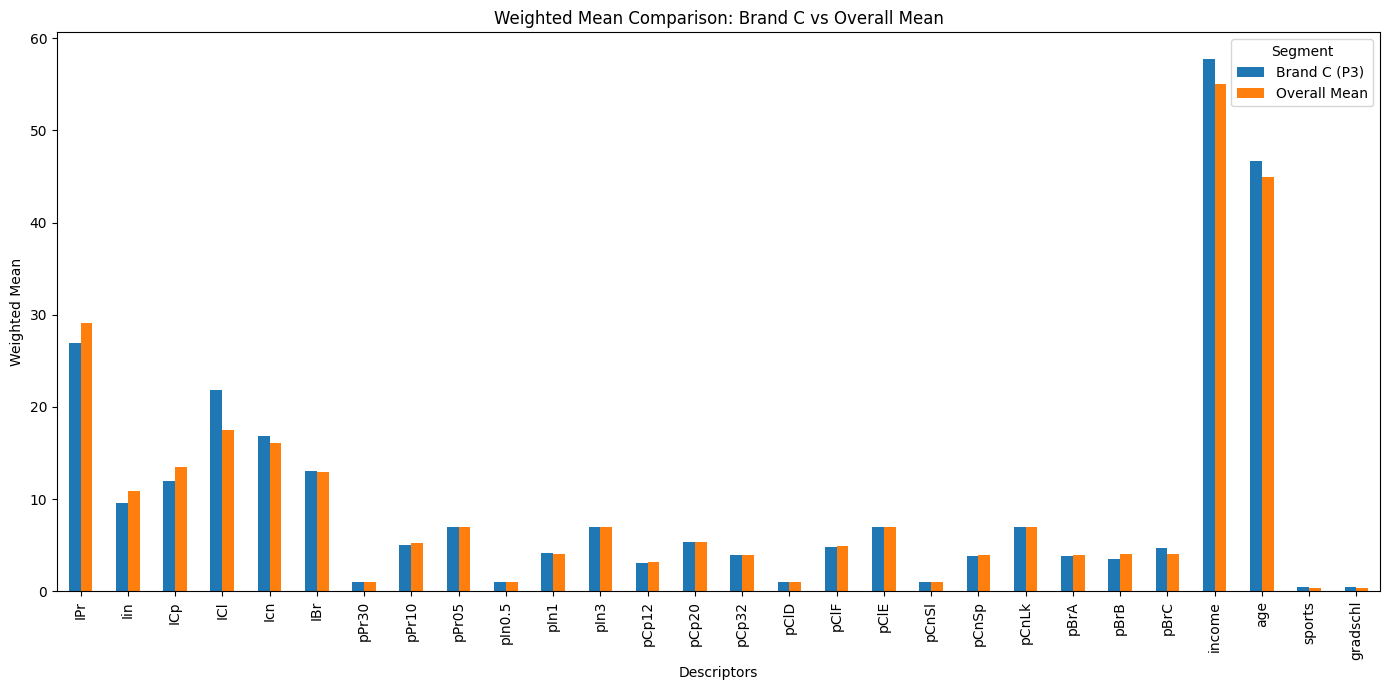

In [ ]:
# ------------------------------------------------------------
# Bar Chart for Weighted Mean Comparison: Brand C vs Overall
# ------------------------------------------------------------

# Select the relevant columns for comparison
comparison_df_C = means_df[['Brand C (P3)', 'Overall Mean']]

# Plotting
ax = comparison_df_C.plot(kind='bar', figsize=(14, 7))

plt.title('Weighted Mean Comparison: Brand C vs Overall Mean')
plt.xlabel('Descriptors')
plt.ylabel('Weighted Mean')
plt.xticks(rotation=90)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------------------------------------
# Identify Top Distinguishing Variables for Brand C (P3) [Candidate Segment]
# ------------------------------------------------------------

sorted_lifts_C = loglifts["C_LogLift"].sort_values(ascending=False)
top_positive_C = sorted_lifts_C.head(5)
top_negative_C = sorted_lifts_C.tail(5)

print("\n Log-Lifts For Brand C:")
print(sorted_lifts_C)

print("\n Top Positive Log-Lifts (Segment Prefers More):")
print(top_positive_C)

print("\n Top Negative Log-Lifts (Segment Prefers Less):")
print(top_negative_C)


 Log-Lifts For Brand C:
gradschl    1.335735e-01
sports      1.007730e-01
ICl         9.579015e-02
pBrC        6.444206e-02
income      2.123165e-02
Icn         1.977479e-02
age         1.585689e-02
pIn1        1.366094e-02
pCp20       1.421234e-03
IBr         5.720743e-04
pIn0.5      0.000000e+00
pPr30       0.000000e+00
pCnSl       0.000000e+00
pClD        0.000000e+00
pClE       -9.643275e-17
pCnLk      -9.643275e-17
pPr05      -9.643275e-17
pIn3       -9.643275e-17
pCp32      -1.161873e-04
pClF       -8.869124e-03
pCp12      -1.021593e-02
pBrA       -1.459568e-02
pCnSp      -1.509769e-02
pPr10      -2.438845e-02
IPr        -3.485917e-02
ICp        -5.077970e-02
Iin        -5.551757e-02
pBrB       -5.608059e-02
Name: C_LogLift, dtype: float64

 Top Positive Log-Lifts (Segment Prefers More):
gradschl    0.133573
sports      0.100773
ICl         0.095790
pBrC        0.064442
income      0.021232
Name: C_LogLift, dtype: float64

 Top Negative Log-Lifts (Segment Prefers Less):
pPr10   

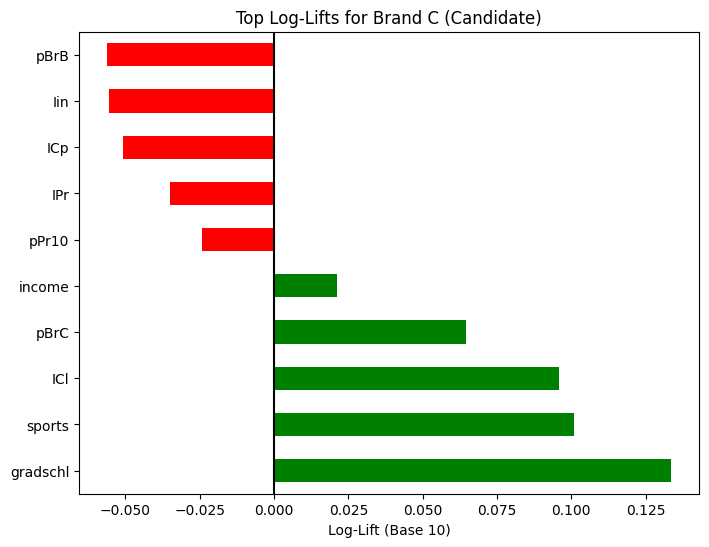

In [ ]:
# Visualization
top_C = pd.concat([top_positive_C, top_negative_C])

plt.figure(figsize=(8,6))
top_C.plot(kind="barh", color=["green" if x>0 else "red" for x in top_C])
plt.axvline(0, color="black")
plt.title("Top Log-Lifts for Brand C (Candidate)")
plt.xlabel("Log-Lift (Base 10)")
plt.show()

#### Brand B

In [ ]:
# ------------------------------------------------------------
# Weighted Mean Comparison: Brand B
# ------------------------------------------------------------

# Select the relevant columns
brand_b_overall = means_df[['Brand B (P2)', 'Overall Mean']]
overall_b_difference = differences_df[['Difference (Overall - B)']]
# Concatenate the selected columns into a single DataFrame
combined_display_df_B = pd.concat([brand_b_overall, overall_b_difference], axis=1)
# Sort the table by Difference
combined_display_df_B_sorted = combined_display_df_B.sort_values(by='Difference (Overall - B)', ascending=False)

print("Weighted Mean Comparison: Brand B")
print(combined_display_df_B_sorted)

Weighted Mean Comparison: Brand B
          Brand B (P2)  Overall Mean  Difference (Overall - B)
income       49.825456     54.996785                  5.171329
Icn          12.426645     16.057878                  3.631233
ICl          14.740863     17.475884                  2.735022
age          42.929351     44.983923                  2.054572
Iin           9.169646     10.887460                  1.717814
ICp          12.103289     13.472669                  1.369380
pBrA          2.886472      3.938907                  1.052435
sports        0.178560      0.334405                  0.155845
IBr          12.888691     12.980707                  0.092016
gradschl      0.254954      0.334405                  0.079452
pCp12         3.099572      3.154341                  0.054768
pCp20         5.332181      5.344051                  0.011871
pClE          7.000000      7.000000                  0.000000
pCnLk         7.000000      7.000000                  0.000000
pCnSl         1.00000

In [ ]:
# ------------------------------------------------------------
# Top 5 and Bottom 5 Weighted Mean: Brand C vs Overall
# ------------------------------------------------------------

print("Top 5 Weighted Mean (Brand B > Overall)")
print(combined_display_df_B_sorted.head(5))

print("\n Bottom 5 Weighted Mean (Brand B < Overall)")
print(combined_display_df_B_sorted.tail(5))

Top 5 Weighted Mean (Brand B > Overall)
        Brand B (P2)  Overall Mean  Difference (Overall - B)
income     49.825456     54.996785                  5.171329
Icn        12.426645     16.057878                  3.631233
ICl        14.740863     17.475884                  2.735022
age        42.929351     44.983923                  2.054572
Iin         9.169646     10.887460                  1.717814

 Bottom 5 Weighted Mean (Brand B < Overall)
       Brand B (P2)  Overall Mean  Difference (Overall - B)
pCnSp      4.102138      3.951768                 -0.150370
pPr10      5.656125      5.266881                 -0.389244
pBrC       4.421896      3.996785                 -0.425111
pBrB       4.601954      4.006431                 -0.595523
IPr       38.641084     29.125402                 -9.515682


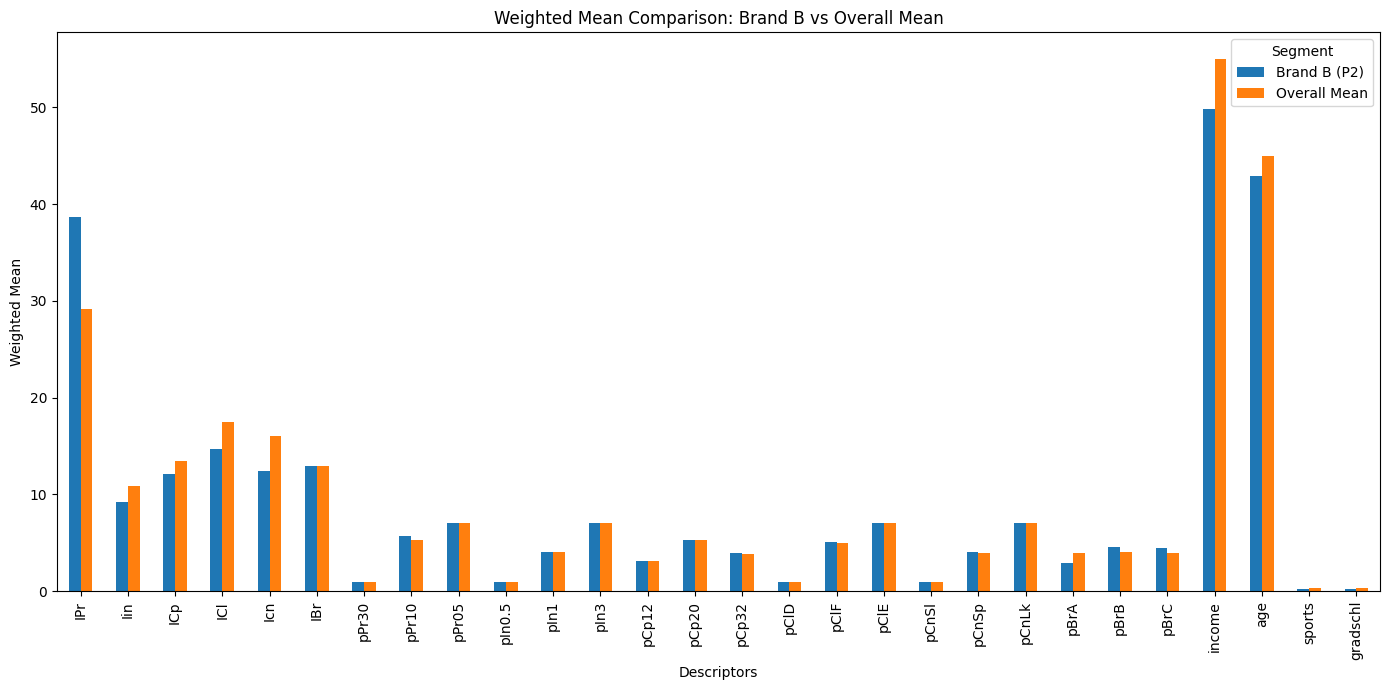

In [ ]:
# ------------------------------------------------------------
# Bar Chart for Weighted Mean Comparison: Brand B vs Overall
# ------------------------------------------------------------

# Select the relevant columns for comparison
comparison_df_B = means_df[['Brand B (P2)', 'Overall Mean']]

# Plotting
ax = comparison_df_B.plot(kind='bar', figsize=(14, 7))

plt.title('Weighted Mean Comparison: Brand B vs Overall Mean')
plt.xlabel('Descriptors')
plt.ylabel('Weighted Mean')
plt.xticks(rotation=90)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------------------------------------
# Identify Top Distinguishing Variables for Brand B (P2) [Incumbent Segment]
# ------------------------------------------------------------

sorted_lifts_B = loglifts["B_LogLift"].sort_values(ascending=False)
top_positive_B = sorted_lifts_B.head(5)
top_negative_B = sorted_lifts_B.tail(5)

print("\n Log-Lifts For Brand B:")
print(sorted_lifts_B)

print("\n Top Positive Log-Lifts (Segment Prefers More):")
print(top_positive_B)

print("\n Top Negative Log-Lifts (Segment Prefers Less):")
print(top_negative_B)


 Log-Lifts For Brand B:
IPr         0.122777
pBrB        0.060185
pBrC        0.043898
pPr10       0.030965
pCnSp       0.016219
pCp32       0.009113
pClF        0.008679
pIn1        0.003244
pIn0.5      0.000000
pIn3        0.000000
pPr30       0.000000
pPr05       0.000000
pCnLk       0.000000
pCnSl       0.000000
pClE        0.000000
pClD        0.000000
pCp20      -0.000966
IBr        -0.003090
pCp12      -0.007607
age        -0.020303
income     -0.042886
ICp        -0.046550
ICl        -0.073916
Iin        -0.074574
Icn        -0.111334
gradschl   -0.117812
pBrA       -0.135008
sports     -0.272489
Name: B_LogLift, dtype: float64

 Top Positive Log-Lifts (Segment Prefers More):
IPr      0.122777
pBrB     0.060185
pBrC     0.043898
pPr10    0.030965
pCnSp    0.016219
Name: B_LogLift, dtype: float64

 Top Negative Log-Lifts (Segment Prefers Less):
Iin        -0.074574
Icn        -0.111334
gradschl   -0.117812
pBrA       -0.135008
sports     -0.272489
Name: B_LogLift, dtype: float6

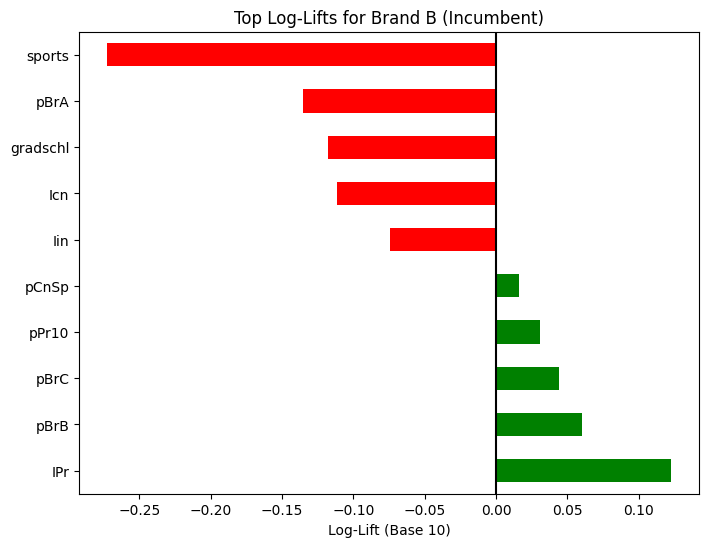

In [ ]:
# Visualization
top_B = pd.concat([top_positive_B, top_negative_B])

plt.figure(figsize=(8,6))
top_B.plot(kind="barh", color=["green" if x>0 else "red" for x in top_B])
plt.axvline(0, color="black")
plt.title("Top Log-Lifts for Brand B (Incumbent)")
plt.xlabel("Log-Lift (Base 10)")
plt.show()

#### Brand A

In [ ]:
# ------------------------------------------------------------
# Weighted Mean Comparison: Brand A
# ------------------------------------------------------------

# Select the relevant columns
brand_a_overall = means_df[['Brand A (P1)', 'Overall Mean']]
overall_a_difference = differences_df[['Difference (Overall - A)']]
# Concatenate the selected columns into a single DataFrame
combined_display_df_A = pd.concat([brand_a_overall, overall_a_difference], axis=1)
# Sort the table by Difference
combined_display_df_A_sorted = combined_display_df_A.sort_values(by='Difference (Overall - A)', ascending=False)

print("Weighted Mean Comparison: Brand A")
print(combined_display_df_A_sorted)

Weighted Mean Comparison: Brand A
          Brand A (P1)  Overall Mean  Difference (Overall - A)
IPr          17.889865     29.125402              1.123554e+01
pBrC          3.081730      3.996785              9.150546e-01
pBrB          3.495819      4.006431              5.106119e-01
pPr10         4.916599      5.266881              3.502817e-01
pCnSp         3.829802      3.951768              1.219660e-01
pIn1          3.929896      4.041801              1.119048e-01
pCp32         3.782963      3.890675              1.077126e-01
pClF          4.866984      4.942122              7.513828e-02
pPr30         1.000000      1.000000              0.000000e+00
pCnSl         1.000000      1.000000              0.000000e+00
pClD          1.000000      1.000000              0.000000e+00
pIn0.5        1.000000      1.000000              0.000000e+00
pCnLk         7.000000      7.000000             -8.881784e-16
pIn3          7.000000      7.000000             -8.881784e-16
pPr05         7.00000

In [ ]:
# ------------------------------------------------------------
# Top 5 and Bottom 5 Weighted Mean: Brand A vs Overall
# ------------------------------------------------------------

print("Top 5 Weighted Mean (Brand A > Overall)")
print(combined_display_df_A_sorted.head(5))

print("\n Bottom 5 Weighted Mean (Brand A < Overall)")
print(combined_display_df_A_sorted.tail(5))

Top 5 Weighted Mean (Brand A > Overall)
       Brand A (P1)  Overall Mean  Difference (Overall - A)
IPr       17.889865     29.125402                 11.235537
pBrC       3.081730      3.996785                  0.915055
pBrB       3.495819      4.006431                  0.510612
pPr10      4.916599      5.266881                  0.350282
pCnSp      3.829802      3.951768                  0.121966

 Bottom 5 Weighted Mean (Brand A < Overall)
        Brand A (P1)  Overall Mean  Difference (Overall - A)
age        46.746468     44.983923                 -1.762545
ICp        16.100413     13.472669                 -2.627745
Iin        13.871925     10.887460                 -2.984465
Icn        20.406393     16.057878                 -4.348516
income     60.245672     54.996785                 -5.248888


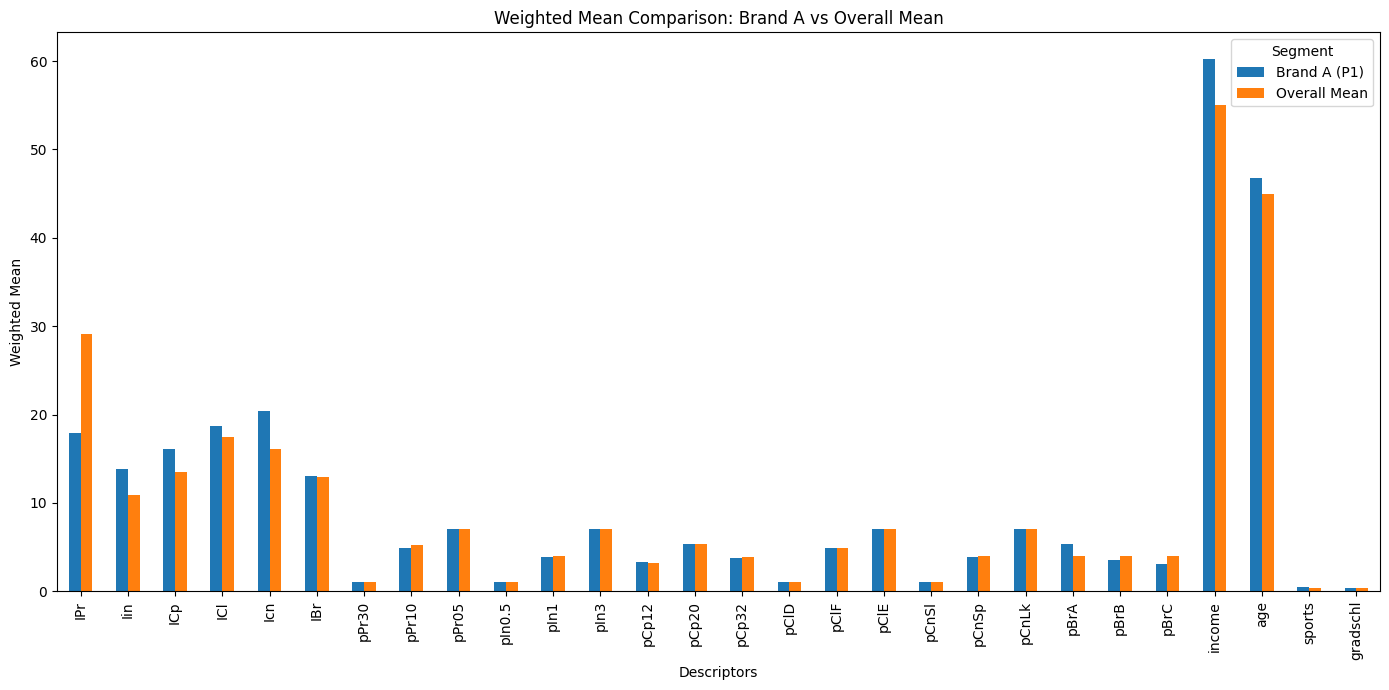

In [ ]:
# ------------------------------------------------------------
# Bar Chart for Weighted Mean Comparison: Brand A vs Overall
# ------------------------------------------------------------

# Select the relevant columns for comparison
comparison_df_A = means_df[['Brand A (P1)', 'Overall Mean']]

# Plotting
ax = comparison_df_A.plot(kind='bar', figsize=(14, 7))

plt.title('Weighted Mean Comparison: Brand A vs Overall Mean')
plt.xlabel('Descriptors')
plt.ylabel('Weighted Mean')
plt.xticks(rotation=90)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------------------------------------
# Identify Top Distinguishing Variables for Brand A (P1) [Incumbent Segment]
# ------------------------------------------------------------

sorted_lifts_A = loglifts["A_LogLift"].sort_values(ascending=False)
top_positive_A = sorted_lifts_A.head(5)
top_negative_A = sorted_lifts_A.tail(5)

print("\n Log-Lifts For Brand A:")
print(sorted_lifts_A)

print("\n Top Positive Log-Lifts (Segment Prefers More):")
print(top_positive_A)

print("\n Top Negative Log-Lifts (Segment Prefers Less):")
print(top_negative_A)


 Log-Lifts For Brand A:
sports      1.660900e-01
pBrA        1.364567e-01
Iin         1.052102e-01
Icn         1.040781e-01
ICp         7.738340e-02
gradschl    4.561143e-02
income      3.958856e-02
ICl         2.840686e-02
age         1.669148e-02
pCp12       1.526527e-02
IBr         3.705343e-03
pCp20       4.709368e-04
pCnLk       9.643275e-17
pPr05       9.643275e-17
pIn3        9.643275e-17
pClE        9.643275e-17
pIn0.5      0.000000e+00
pClD        0.000000e+00
pCnSl       0.000000e+00
pPr30       0.000000e+00
pClF       -6.653568e-03
pCp32      -1.219293e-02
pIn1       -1.219384e-02
pCnSp      -1.361512e-02
pPr10      -2.988869e-02
pBrB       -5.920872e-02
pBrC       -1.129162e-01
IPr        -2.116649e-01
Name: A_LogLift, dtype: float64

 Top Positive Log-Lifts (Segment Prefers More):
sports    0.166090
pBrA      0.136457
Iin       0.105210
Icn       0.104078
ICp       0.077383
Name: A_LogLift, dtype: float64

 Top Negative Log-Lifts (Segment Prefers Less):
pCnSp   -0.013615


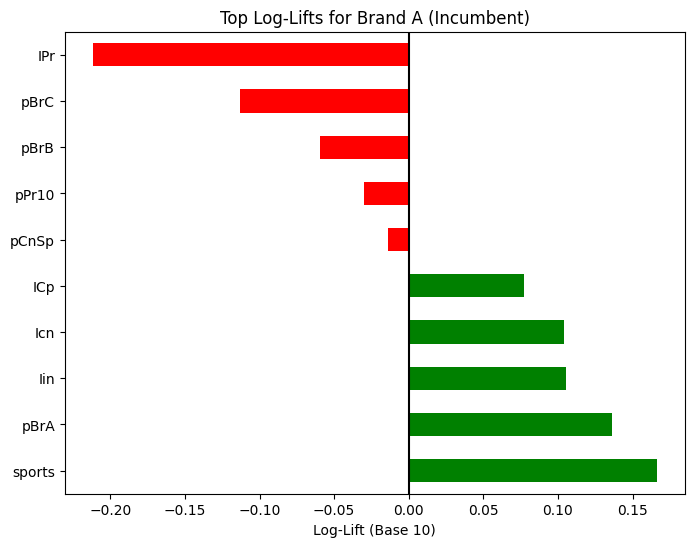

In [ ]:
# Visualization
top_A = pd.concat([top_positive_A, top_negative_A])

plt.figure(figsize=(8,6))
top_A.plot(kind="barh", color=["green" if x>0 else "red" for x in top_A])
plt.axvline(0, color="black")
plt.title("Top Log-Lifts for Brand A (Incumbent)")
plt.xlabel("Log-Lift (Base 10)")
plt.show()

### Comparison And Segment Distribution

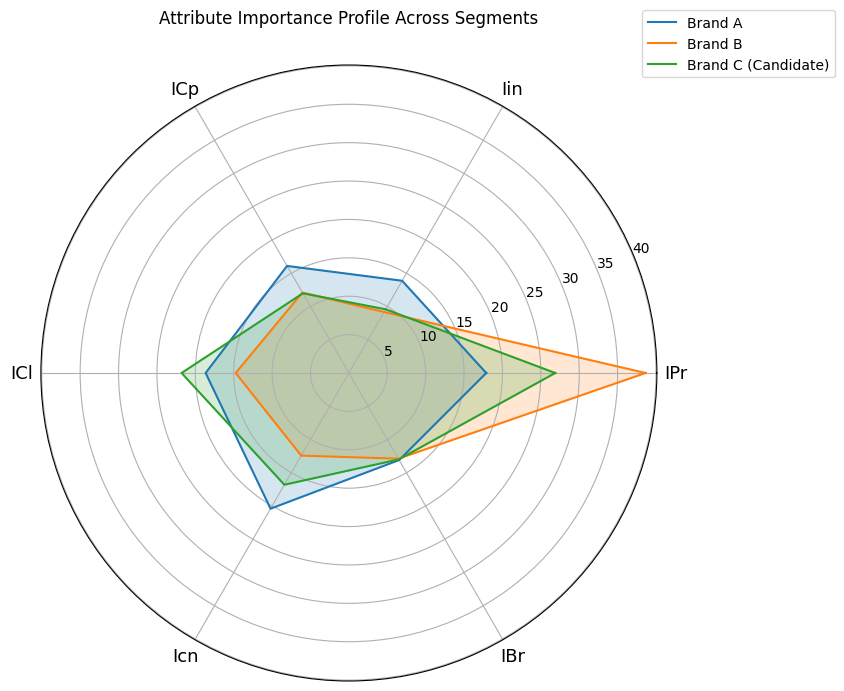

In [ ]:
# ------------------------------------------------------------
# Radar Chart for Importance Scores
# ------------------------------------------------------------

# Prepare angles
N = len(importance_vars)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]


def radar(values, label):
    v = values.tolist() + values.tolist()[:1]
    plt.polar(angles, v, label=label)
    plt.fill(angles, v, alpha=0.18)

plt.figure(figsize=(8,8))
radar(means_A[importance_vars], "Brand A")
radar(means_B[importance_vars], "Brand B")
radar(means_C[importance_vars], "Brand C (Candidate)")
plt.xticks(angles[:-1], [variable_labels[v] for v in importance_vars], fontsize=11)
plt.title("Attribute Importance Profile Across Segments", pad=30)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

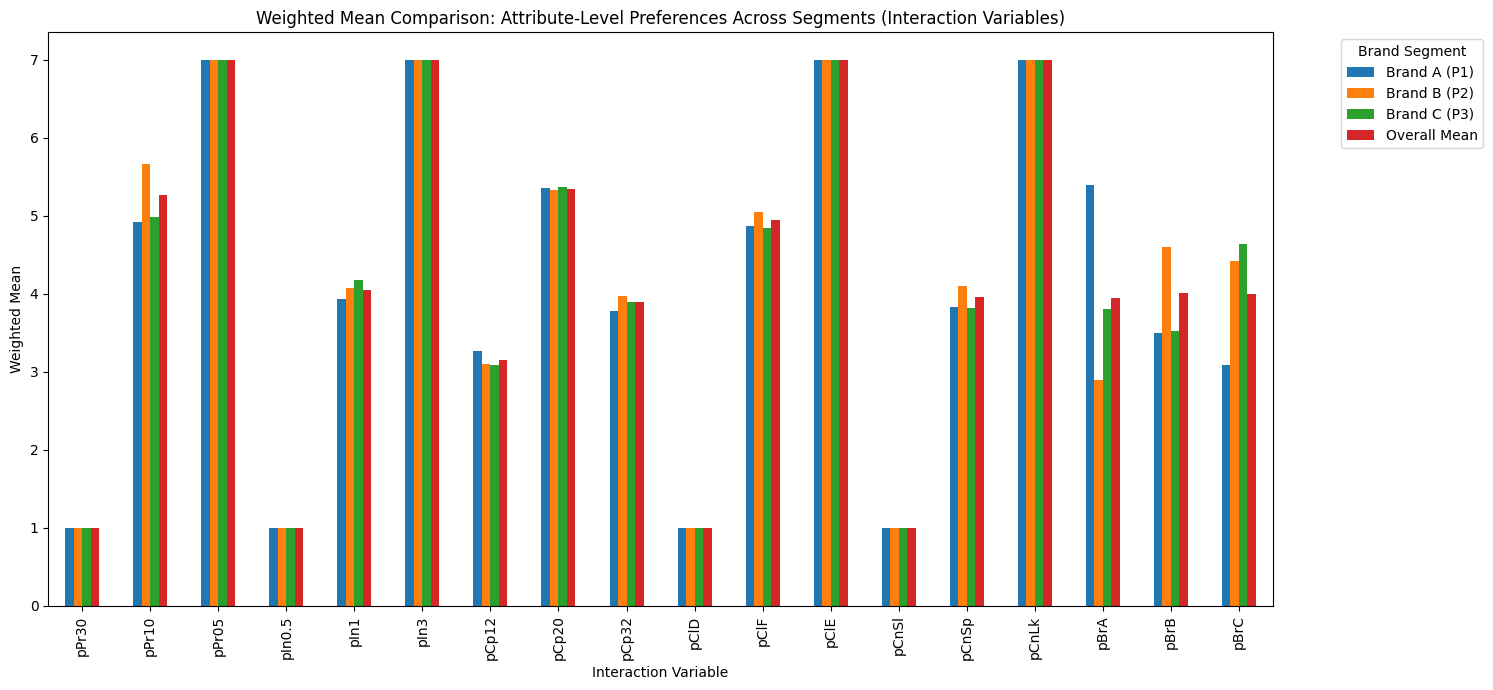

In [ ]:
# ------------------------------------------------------------
# Grouped Bar Chart for Interaction Variables
# ------------------------------------------------------------

# Filter interaction_vars to include only those present in means_df index
interaction_vars_present = [v for v in interaction_vars if v in means_df.index]

# Select the relevant columns for the bar chart
df_to_plot = means_df.loc[interaction_vars_present, ['Brand A (P1)', 'Brand B (P2)', 'Brand C (P3)', 'Overall Mean']]

# Plotting
ax = df_to_plot.plot(kind='bar', figsize=(15, 7))

plt.title('Weighted Mean Comparison: Attribute-Level Preferences Across Segments (Interaction Variables)')
plt.xlabel('Interaction Variable')
plt.ylabel('Weighted Mean')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.legend(title='Brand Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

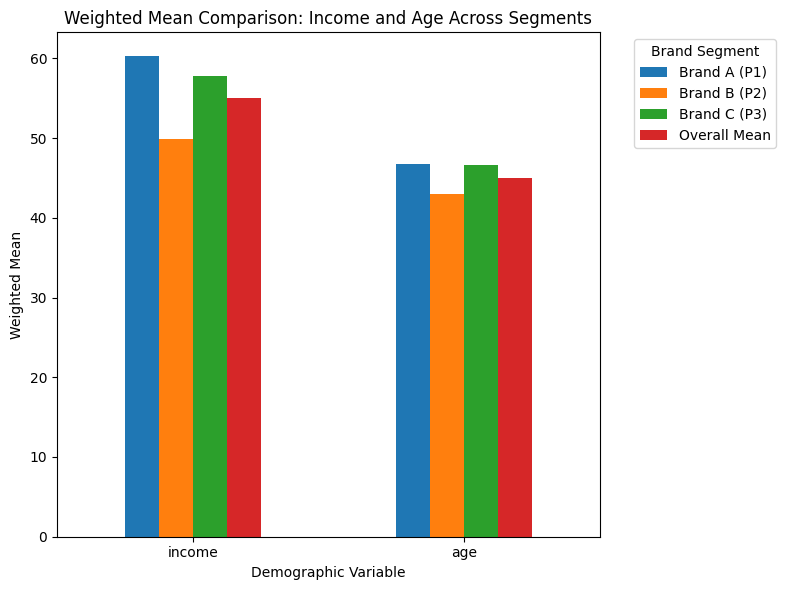

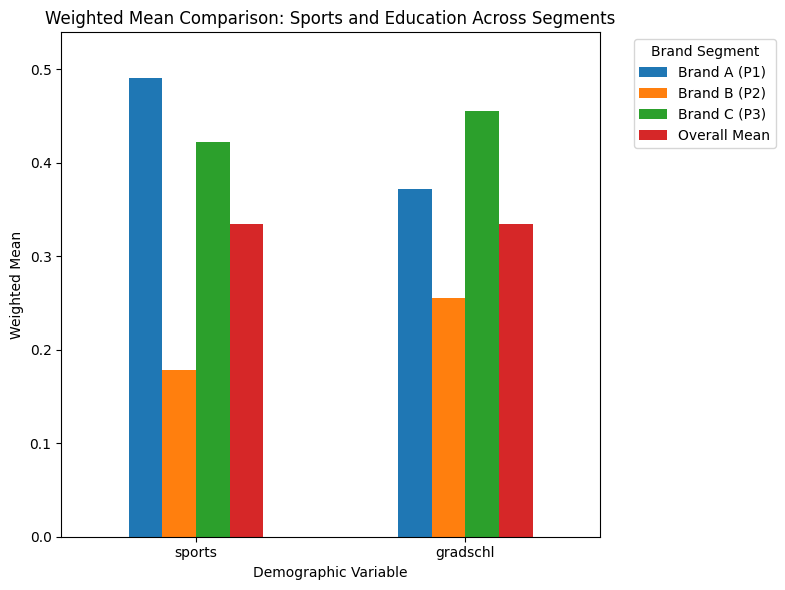

In [ ]:
# ------------------------------------------------------------
# Grouped Bar Charts for Demographic Variables
# ------------------------------------------------------------

# Select the relevant columns for the bar chart
df_to_plot = means_df.loc[demo_vars, ['Brand A (P1)', 'Brand B (P2)', 'Brand C (P3)', 'Overall Mean']]

# Separate plotting for variables with different scales
demographics_high_scale = ['income', 'age']
demographics_low_scale = ['sports', 'gradschl']

# Plot for high scale demographics
df_high_scale = df_to_plot.loc[[v for v in demographics_high_scale if v in df_to_plot.index]]
if not df_high_scale.empty:
    ax1 = df_high_scale.plot(kind='bar', figsize=(8, 6))
    plt.title('Weighted Mean Comparison: Income and Age Across Segments')
    plt.xlabel('Demographic Variable')
    plt.ylabel('Weighted Mean')
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Brand Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot for low scale demographics (sports and gradschl)
df_low_scale = df_to_plot.loc[[v for v in demographics_low_scale if v in df_to_plot.index]]
if not df_low_scale.empty:
    ax2 = df_low_scale.plot(kind='bar', figsize=(8, 6))
    plt.title('Weighted Mean Comparison: Sports and Education Across Segments')
    plt.xlabel('Demographic Variable')
    plt.ylabel('Weighted Mean')
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Brand Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Set y-axis limit for better readability of values between 0 and 1
    plt.ylim(0, df_low_scale.values.max() * 1.1 if df_low_scale.values.max() > 0 else 1)
    plt.tight_layout()
    plt.show()

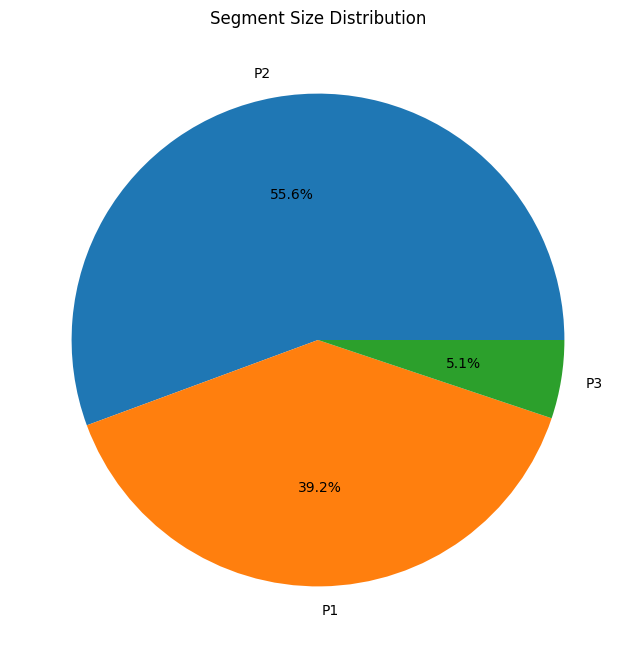

In [ ]:
# ------------------------------------------------------------
# Segment Size Distribution
# ------------------------------------------------------------

# Assign each consumer to the segment with the highest posterior probability
data["segment"] = data[["P1","P2","P3"]].idxmax(axis=1)

data["segment"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8,8))
plt.title("Segment Size Distribution")
plt.ylabel("")
plt.show()

In [ ]:
print(data["segment"].value_counts(normalize=True))

segment
P2    0.556270
P1    0.392283
P3    0.051447
Name: proportion, dtype: float64
